# Author: Alen Pavlovic
The University of Chicago, MasterTrack Certificate - Machine Learning for Analytics

In [1]:
# Import the necessary library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV

# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures


## Dataset Description

1. `pin14`: Unique Permanent Identification Number for each property. All PINs are 14 digits: 2 digits for area + 2 digits for sub area + 2 digits for block + 2 digits for parcel + 4 digits for the multicode.
2. `tri`: Geographic location variable divided into 3 areas: Chicago, Northwest suburb, Southwest suburb.
3. `pdir`: Abbreviation for direction in property street address (N,S,E,W, etc.).
4. `pstreet`: Property street name.
5. `pcity`: Property city.
6. `tcity`: Taxpayer mailing address city.
7. `condo`: Property classified as condominium or non-condominium.
8. `av1`: First pass assessed value. Assessed value from CCAO prior to any appeal.
9. `value`: Property’s actual sale value when it sold.
10. `taxes`: Amount of annual taxes paid by property owner.
11. `homeowner`: Homeowner occupied flag.
12. `white`: Percentage of associated property census tract inhabitants identified as White on US census.
13. `black`: Percentage of associated property’s census tract inhabitants identified as Black on US census.
14. `hispanic`: Percentage of associated property’s census tract inhabitants identified as Hispanic on US census.
15. `asian`: Percentage of property’s census tract inhabitants identified as Asian on US census.
16. `medhinc`: Median household income of the property’s census tract.
17. `poverty`: Percentage of property’s census tract inhabitants earning below the federal poverty rate.
18. `college`: Percentage of eligible adults in the property’s census tract with a 4 year college degree.
19. `squarefoot`: Building square footage.
20. `beds`: Number of bedrooms in the property, defined based on building squarefoot and the judgement of the person in the field.
21. `walkscore`: Walkability score on a 100 point scale, using property distance to amenities.
22. `walkfac`: Walkscores transferred into a 4 level category variable ranging from “car-dependent” to “Walker’s Paradise”.
23. `elem_score`: Greatschools rating for closest public neighborhood elementary school (distance measured with haversine formula) Greatschools Rating based on the Test Score Rating, Student or Academic Progress Rating, College Readiness Rating, and Equity Rating.
24. `high_school_score`: Greatschools rating for closest public neighborhood high school (distance measured with haversine formula) Greatschools Rating based on the Test Score Rating, Student or Academic Progress Rating, College Readiness Rating, and Equity Rating.
25. `avg_school_score`: Average of associated elementary and high school Greatschools ratings.
26. `appeal`: Dollar amount deducted from assessed value after property owner appealed. If NA there was no appeal.

In [89]:
# Load the data into a pandas dataframe
df = pd.read_csv('project2data.csv')
df.head()

,pin14,tri,pdir,pstreet,pcity,tcity,condo,av1,value,taxes,...,poverty,college,squarefoot,beds,walkscore,walkfac,elem_score,high_school_score,avg_school_score,appeal
0,2.033200e+13,Chicago,S,LASALLE,CHICAGO,CHICAGO,Non-condo,11558.0,108000,1585.2000,...,0.408146,0.149720,1223.0,3.0,73,Very Walkable,1,6,4,0.0
1,2.414410e+13,Chicago,S,SAWYER,CHICAGO,CHICAGO,Non-condo,19357.0,215000,3032.4399,...,0.004164,0.223537,1320.0,3.0,55,Somewhat Walkable,10,8,9,0.0
2,1.408420e+13,Chicago,W,AINSLIE,CHICAGO,CHICAGO,Non-condo,76189.0,1364225,11644.6900,...,0.263047,0.344634,4800.0,12.0,82,Very Walkable,5,2,4,4199.0
3,1.419130e+13,Chicago,N,OAKLEY,CHICAGO,CHICAGO,Non-condo,61525.0,1091500,3215.5500,...,0.011499,0.517047,2620.0,4.0,76,Very Walkable,8,10,9,39109.0
4,1.129100e+13,Chicago,W,JUNEWAY,CHICAGO,CHICAGO,Non-condo,44434.0,380000,7200.3799,...,0.323849,0.182889,1976.0,4.0,66,Somewhat Walkable,2,1,2,0.0


In [90]:
display(df.describe())

,pin14,av1,value,taxes,homeowner,white,black,hispanic,asian,medhinc,poverty,college,squarefoot,beds,walkscore,elem_score,high_school_score,avg_school_score,appeal
count,1.903600e+04,1.899100e+04,1.903600e+04,19036.000000,19036.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,13915.000000,13915.000000,19036.000000,19036.000000,19036.000000,19036.000000,9.018000e+03
mean,1.806325e+13,3.036896e+04,3.564597e+05,4972.586580,0.426087,0.625657,0.205279,0.186143,0.139870,67020.153960,0.135024,0.318044,1908.737478,3.648653,69.779838,5.453719,5.394883,5.644411,5.394141e+03
std,5.788279e+12,2.961622e+04,3.641909e+05,4233.282368,0.494520,0.274867,0.296543,0.214204,0.118632,26266.301109,0.099465,0.212173,1167.077974,1.701771,23.504392,2.406259,2.865633,2.223499,2.029286e+04
min,9.253050e+12,-1.045572e+06,5.000000e+03,0.000000,0.000000,0.001088,0.000789,0.001889,0.000000,9550.000000,0.003604,0.004178,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,1.418130e+13,1.534750e+04,1.750000e+05,2479.315050,0.000000,0.499139,0.020925,0.053135,0.053844,47972.000000,0.065292,0.134969,1151.000000,3.000000,55.000000,3.000000,3.000000,4.000000,0.000000e+00
50%,1.704110e+13,2.367500e+04,2.660000e+05,3940.760000,0.000000,0.703167,0.051095,0.091340,0.099713,63529.000000,0.112022,0.265332,1567.000000,3.000000,75.000000,6.000000,5.000000,6.000000,1.177500e+03
75%,2.016100e+13,3.680350e+04,4.130000e+05,6088.760125,1.000000,0.851731,0.261715,0.217768,0.194202,84167.000000,0.170868,0.505770,2297.000000,4.000000,89.000000,7.000000,8.000000,7.000000,4.375000e+03
max,3.331210e+13,7.639090e+05,1.500000e+07,133258.690000,1.000000,0.970822,0.993390,0.979010,0.896609,192143.000000,0.776376,0.766168,27270.000000,24.000000,100.000000,10.000000,10.000000,10.000000,1.164486e+06


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19036 entries, 0 to 19035
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pin14              19036 non-null  float64
 1   tri                19036 non-null  object 
 2   pdir               13509 non-null  object 
 3   pstreet            19035 non-null  object 
 4   pcity              19035 non-null  object 
 5   tcity              19036 non-null  object 
 6   condo              19036 non-null  object 
 7   av1                18991 non-null  float64
 8   value              19036 non-null  int64  
 9   taxes              19036 non-null  float64
 10  homeowner          19036 non-null  int64  
 11  white              18914 non-null  float64
 12  black              18914 non-null  float64
 13  hispanic           18914 non-null  float64
 14  asian              18914 non-null  float64
 15  medhinc            18914 non-null  float64
 16  poverty            189

The `info()` method shows that there are 19,036 entries in the dataset with 26 columns. The columns include both numerical (float64 and int64) and categorical (object) variables

In [92]:
# missing data
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df))*100
missing_data= pd.DataFrame({'count':missing_count,'percentage':missing_percentage})
display(missing_data)

,count,percentage
pin14,0,0.000000
tri,0,0.000000
pdir,5527,29.034461
pstreet,1,0.005253
pcity,1,0.005253
tcity,0,0.000000
condo,0,0.000000
av1,45,0.236394
value,0,0.000000
taxes,0,0.000000


After loading the dataset, we conducted an initial data quality assessment. Our dataset contains information on 19,036 properties, each characterized by 26 different variables.

We found that several columns in our dataset contain missing values, with varying degrees of severity. The extent of missingness ranges from a mere 0.01% (in the `pstreet` and `pcity` columns) up to 26.9% (in the `squarefoot` & `beds` column).

## Data Cleaning

### pin14

In [93]:
# Check for uniqueness
unique_check = df['pin14'].nunique() ==df.shape[0]

# Check for missing or null values
missing_check = df['pin14'].isnull().sum() == 0

# Check for validity
validity_check = np.all(df['pin14'].apply(lambda x: len(str(int(x))) == 14))

display(unique_check,missing_check,validity_check)

False

True

False

In [94]:
df['pin14'][100]

13072100000000.0

In [95]:
# Drop due to incompletenes
df.drop(columns= ['pin14'], inplace=True)
'pin14' not in df.columns

True

### tri

In [96]:
# Check for missing values in the 'tri' column
missing_check = df['tri'].isnull().sum()

# Get the unique values and their counts in the 'tri' column
unique_values = df['tri'].value_counts()

# Check for leading/trailing white spaces in the 'tri' column
whitespace_check = any(df['tri'].apply(lambda x: x != x.strip()))

display(missing_check, unique_values, whitespace_check)

0

Chicago                           11441
Southwest Suburban Cook County     6208
Northwest Suburban Cook County     1387
Name: tri, dtype: int64

False

**Missing values**: There are no missing or null values in the tri column. This check passed.

**Unique values**: The `tri` column contains three unique values:

- 'Chicago' appears 11,441 times
- 'Southwest Suburban Cook County' appears 6,208 times
- 'Northwest Suburban Cook County' appears 1,387 times

This suggests that the `tri` column represents three different regions.

**Whitespace check**: There are no leading or trailing white spaces in the tri column. This check passed.

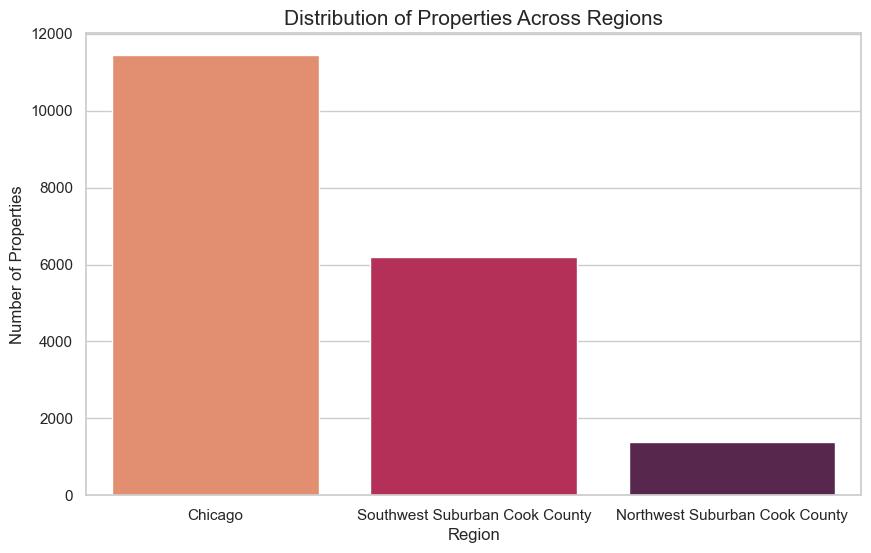

In [98]:
# Set the style and size of the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Generate a bar plot of the 'tri' column using Seaborn with a red palette
ax = sns.countplot(x="tri", data=df, order=df['tri'].value_counts().index, palette="rocket_r")

# Add a title and labels to the plot
plt.title('Distribution of Properties Across Regions', fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)

# Display the plot
plt.show()

In [11]:
# Create dummy variables for the 'tri' column
tri_dummies = pd.get_dummies(df['tri'], prefix='tri', drop_first=True)

# Concatenate the dummy variables to the original dataframe
df= pd.concat([df, tri_dummies], axis=1)

# Drop the original 'tri' column
df.drop(columns = ['tri'], inplace=True)

### pdir

In [12]:
# Check for missing values in the 'pdir' column
missing_check = df['pdir'].isnull().sum()

# Get the unique values and their counts in the 'pdir' column
unique_values = df['pdir'].value_counts(dropna=False)

display(missing_check, unique_values)

5527

NaN    5527
N      5139
W      4173
S      3467
E       730
Name: pdir, dtype: int64

**Missing values**: There are 5,527 missing or null values in the pdir column.

**Unique values**: The `pdir` column contains four unique values:

- 'N' appears 5,139 times
- 'W' appears 4,173 times
- 'S' appears 3,467 times
- 'E' appears 730 times

The `pdir` column appears to represent cardinal directions (North, West, South, East).

In [13]:
df['pdir'].fillna('Unknown', inplace=True)

We filled the `pdir` column's missing values with "Unknown", assuming these are Missing Completely at Random (MCAR). This approach allows us to retain all the data, now having five unique values: "N", "W", "S", "E", and "Unknown". While this method is commonly used, it's worth noting that if the missingness is not random but related to another variable, it could introduce **bias** into our analysis. We may need to reconsider this decision during further data exploration and model development.

In [14]:
# Create dummy variables for the 'pdit' column
pdir_dummies = pd.get_dummies(df['pdir'], prefix='pdir', drop_first=True)

# Concatenate the dummy variables to the original dataframe
df= pd.concat([df, pdir_dummies], axis=1)

# Drop the original 'tri' column
df.drop(columns = ['pdir'], inplace=True)

## pstreet

In [15]:
# Check for missing values in the 'pstreet' column
missing_check = df['pstreet'].isnull().sum()

# Get the unique values and their counts in the 'pstreet' column
unique_values = df['pstreet'].value_counts()

display(missing_check, unique_values)

1

LAKE SHORE     245
SHERIDAN       223
MICHIGAN       150
PRAIRIE        115
STATE          111
              ... 
HERRICK          1
BROADVIEW        1
STEEPLES         1
DUNLOP           1
BRIDLE PATH      1
Name: pstreet, Length: 2231, dtype: int64

In [16]:
df.drop(columns = ['pstreet'], inplace=True)
not 'pstreet' in df.columns

True

### pcity

In [17]:
# Check for missing values in the 'pcity' column
missing_check = df['pcity'].isnull().sum()

# Get the unique values and their counts in the 'pcity' column
unique_values = df['pcity'].value_counts()

display(missing_check, unique_values)

1

CHICAGO                11483
OAK PARK                 363
ORLAND PARK              348
EVANSTON                 348
SKOKIE                   327
                       ...  
FORD HEIGHTS               1
NORWOOD PARK               1
LA GRANGE HIGHLANDS        1
ELMHURST                   1
ORLAND                     1
Name: pcity, Length: 103, dtype: int64

**Missing values**: There is 1 missing or null value in the `pcity` column.

**Unique values**: The `pcity` column contains 103 unique values. The city with the most properties is 'CHICAGO' with 11,483 properties. There are many other cities represented in the data, with varying numbers of properties.

In [18]:
df.dropna(subset=['pcity'], inplace=True)
df['pcity'].isnull().sum()

0

In [19]:
# Define the threshold
threshold = 500

# Get value counts of 'pcity'
value_counts = df['pcity'].value_counts()

# Identify the labels to be replaced
to_replace = value_counts[value_counts <= threshold].index

# Replace the labels in 'pcity' column
df['pcity'] = df['pcity'].replace(to_replace, 'Other')

# Display the updated value counts
df['pcity'].value_counts()


CHICAGO    11483
Other       7552
Name: pcity, dtype: int64

In [20]:
df['pcity_bin'] = np.where(df['pcity'].str.lower() == 'chicago', 1, 0)
# Drop the original 'pcity' column
df.drop(columns = ['pcity'], inplace=True)
df.tail()

,tcity,condo,av1,value,taxes,homeowner,white,black,hispanic,asian,...,high_school_score,avg_school_score,appeal,tri_Northwest Suburban Cook County,tri_Southwest Suburban Cook County,pdir_N,pdir_S,pdir_Unknown,pdir_W,pcity_bin
19031,MAYWOOD,Non-condo,15299.0,150000,3238.2100,1,0.084563,0.822867,0.116087,0.064799,...,4,4,0.0,0,1,0,1,0,0,0
19032,MATTESON,Non-condo,29350.0,250000,5338.6299,0,0.050094,0.907076,0.030683,0.023043,...,1,3,1553.0,0,1,0,0,1,0,0
19033,OAK PARK,Non-condo,62283.0,720000,17454.5200,1,0.682525,0.199005,0.065609,0.078980,...,10,8,0.0,0,1,0,1,0,0,0
19034,ALSIP,Non-condo,19379.0,145000,2541.8799,0,0.766541,0.107988,0.198053,0.099358,...,6,6,0.0,0,1,0,1,0,0,0
19035,OAK PARK,Non-condo,47657.0,639500,5561.2402,1,0.860785,0.071613,0.039244,0.041535,...,10,8,3308.0,0,1,0,0,1,0,0


### tcity

In [21]:
# Check for missing values in the 'tcity' column
missing_check = df['tcity'].isnull().sum()

# Get the unique values and their counts in the 'tcity' column
unique_values = df['tcity'].value_counts()

# Check for leading/trailing white spaces in the 'tcity' column
whitespace_check = df['tcity'].apply(lambda x: x != x.strip() if isinstance(x, str) else False).any()

display(missing_check, unique_values, whitespace_check)

0

CHICAGO         10501
OAK PARK          348
SKOKIE            335
EVANSTON          327
ORLAND PARK       281
                ...  
OLNEY               1
NASHVILLE           1
QUINCY              1
EAST LANSING        1
OAKPARK             1
Name: tcity, Length: 641, dtype: int64

False

In [22]:
# Define the threshold
threshold = 500

# Get value counts of 'tcity'
value_counts = df['tcity'].value_counts()

# Identify the labels to be replaced
to_replace = value_counts[value_counts <= threshold].index

# Replace the labels in 'tcity' column
df['tcity'] = df['tcity'].replace(to_replace, 'Other')

# Display the updated value counts
df['tcity'].value_counts()

CHICAGO    10501
Other       8534
Name: tcity, dtype: int64

In [23]:
df['tcity_bin'] = np.where(df['tcity'].str.lower() == 'chicago', 1, 0)
# Drop the original 'pcity' column
df.drop(columns = ['tcity'], inplace=True)
df.tail()

,condo,av1,value,taxes,homeowner,white,black,hispanic,asian,medhinc,...,avg_school_score,appeal,tri_Northwest Suburban Cook County,tri_Southwest Suburban Cook County,pdir_N,pdir_S,pdir_Unknown,pdir_W,pcity_bin,tcity_bin
19031,Non-condo,15299.0,150000,3238.2100,1,0.084563,0.822867,0.116087,0.064799,41642.0,...,4,0.0,0,1,0,1,0,0,0,0
19032,Non-condo,29350.0,250000,5338.6299,0,0.050094,0.907076,0.030683,0.023043,70385.0,...,3,1553.0,0,1,0,0,1,0,0,0
19033,Non-condo,62283.0,720000,17454.5200,1,0.682525,0.199005,0.065609,0.078980,68750.0,...,8,0.0,0,1,0,1,0,0,0,0
19034,Non-condo,19379.0,145000,2541.8799,0,0.766541,0.107988,0.198053,0.099358,52839.0,...,6,0.0,0,1,0,1,0,0,0,0
19035,Non-condo,47657.0,639500,5561.2402,1,0.860785,0.071613,0.039244,0.041535,159800.0,...,8,3308.0,0,1,0,0,1,0,0,0


### condo

In [24]:
# Check for missing values in the 'condo' column
missing_check = df['condo'].isnull().sum()

# Get the unique values and their counts in the 'condo' column
unique_values = df['condo'].value_counts()

display(missing_check, unique_values)

0

Non-condo      14035
Condominium     5000
Name: condo, dtype: int64

The `condo` column, which indicates whether a property is classified as a condominium or not, doesn't have any missing values.

There are two unique values in this column: "Non-condo" and "Condominium", occurring 14,035 and 5,000 times, respectively.

In [25]:
# Convert the 'condo' column into a binary numerical variable
df['condo'] = df['condo'].map({'Non-condo': 0, 'Condominium': 1})

# Check the unique values and their counts in the 'condo' column after the conversion
unique_condo = df['condo'].value_counts(dropna=False)

unique_condo

0    14035
1     5000
Name: condo, dtype: int64

The `condo` column has been converted into a binary numerical variable. Now, "Non-condo" is represented by 0 and "Condominium" is represented by 1.

### av1

In [26]:
# Check for missing or null values in the 'av1' column
missing_av1 = df['av1'].isnull().sum()

# Get the summary statistics for the 'av1' column
summary_av1 = df['av1'].describe().apply("{0:.2f}".format)

display(missing_av1, summary_av1)

45

count       18990.00
mean        30369.33
std         29616.96
min      -1045572.00
25%         15347.25
50%         23675.00
75%         36804.75
max        763909.00
Name: av1, dtype: object

The summary statistics indicate that the mean value is around 30,369. However, there is a wide range in the values of this column, with a minimum of approximately -1,045,572 and a maximum of 763,909. This significant difference between the minimum and maximum values suggests that there might be outliers in the data, and the negative minimum value could potentially be an error or represent a specific condition in the data.

The standard deviation is also quite large, indicating that the values in the `av1` column are spread out over a wide range.

Let's visualize the distribution of the `av1` column to get a better understanding of its data distribution and to identify potential outliers. We'll use a histogram for this purpose. Please note that due to the existence of missing values, we'll only visualize the non-missing data.

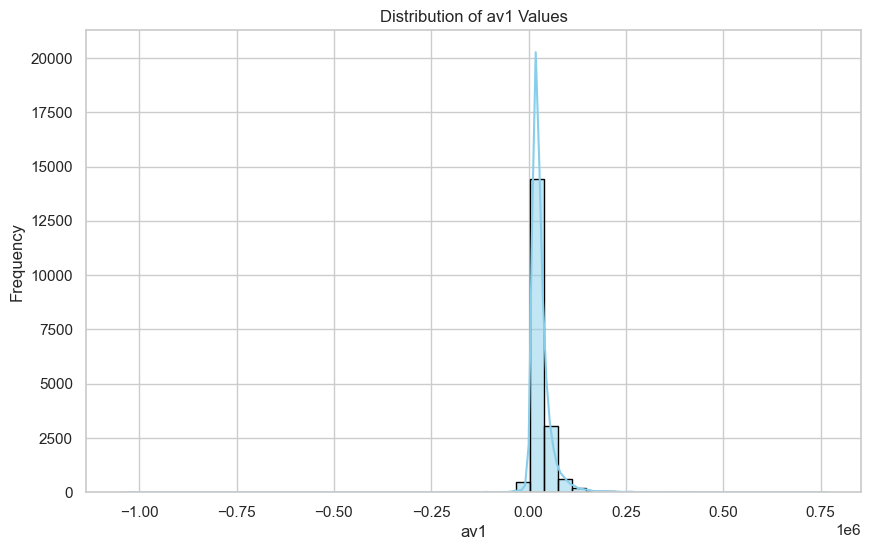

In [27]:
# Exclude missing values for the visualization
av1_non_missing = df['av1'].dropna()

# Plot a histogram using seaborn
plt.figure(figsize=(10,6))
sns.histplot(av1_non_missing, bins=50, edgecolor = 'black' , color='skyblue', kde=True)
plt.title('Distribution of av1 Values')
plt.xlabel('av1')
plt.ylabel('Frequency')
plt.show()

Here's the histogram for the `av1` values using seaborn. This plot also includes a kernel density estimate (KDE) line which provides a smooth curve that represents the data distribution.

As we observed earlier, the distribution of av1 values is right-skewed with a long tail towards the right, indicating the presence of high-value outliers. Additionally, most of the `av1` values cluster on the left side of the histogram, close to lower values.

In [28]:
#skewness and kurtosis
print("Skewness: %f" % df['av1'].skew())
print("Kurtosis: %f" % df['av1'].kurt())

Skewness: 0.677577
Kurtosis: 137.831992


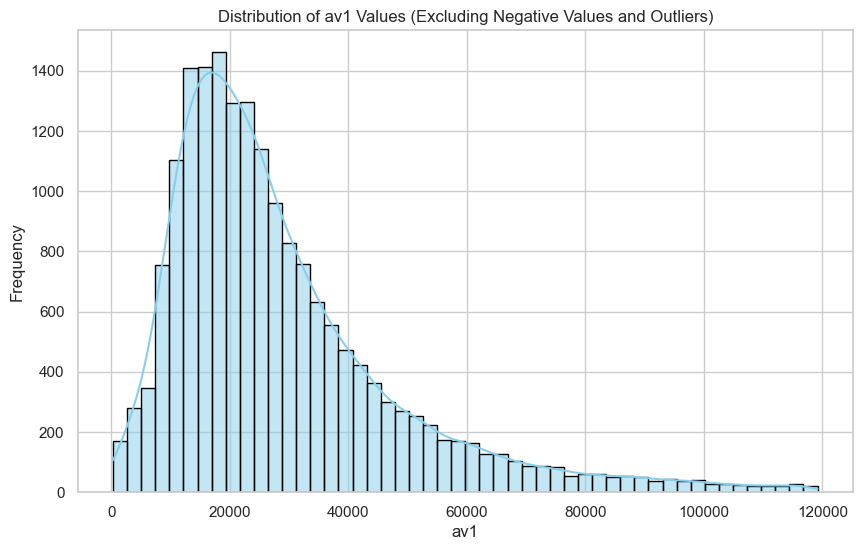

In [29]:
# Calculate the mean and standard deviation of the 'av1' column
mean_av1 = df['av1'].mean()
std_av1 = df['av1'].std()

# Define an upper limit as mean + 3*std_dev, which covers about 99.7% of the data if it's normally distributed
upper_limit = mean_av1 + 3*std_av1

# Exclude negative values and outliers for the visualization
#av1_cleaned = np.log(df[(df['av1'] >= 0) & (df['av1'] <= upper_limit)]['av1'])
av1_cleaned = df[(df['av1'] >= 0) & (df['av1'] <= upper_limit)]['av1']

# Plot a histogram using seaborn for the cleaned data
plt.figure(figsize=(10,6))
sns.histplot(av1_cleaned, bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of av1 Values (Excluding Negative Values and Outliers)')
plt.xlabel('av1')
plt.ylabel('Frequency')
plt.show()

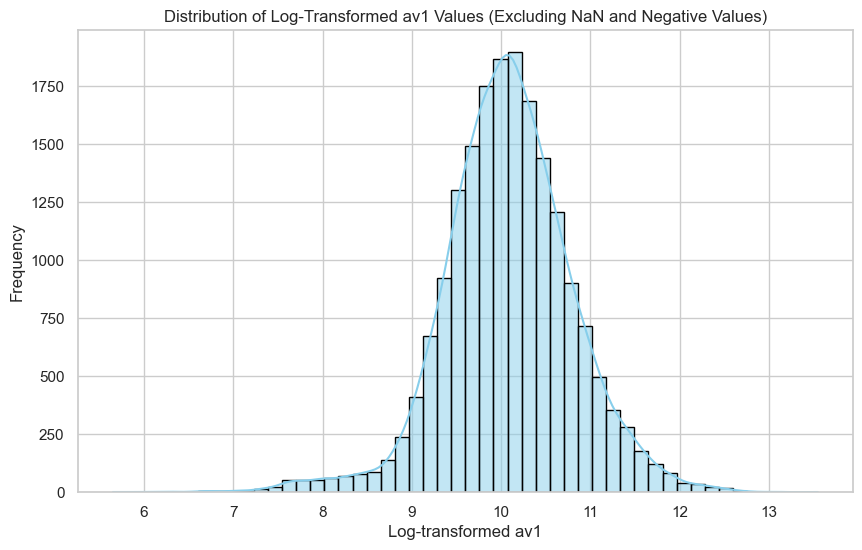

In [30]:
# Drop rows with NaN or negative 'av1' values from the original DataFrame
df.drop(df[(df['av1'].isna()) | (df['av1'] <= 0)].index, inplace=True)

# Apply log transformation to 'av1' values and add to the DataFrame
df['av1_log'] = np.log(df['av1'])

# Drop the original 'av1' column
df.drop(columns='av1', inplace=True)

# Plot a histogram of the log-transformed 'av1' values
plt.figure(figsize=(10,6))
sns.histplot(df['av1_log'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Log-Transformed av1 Values (Excluding NaN and Negative Values)')
plt.xlabel('Log-transformed av1')
plt.ylabel('Frequency')
plt.show()

### value

In [31]:
# Check for missing or null values in the 'value' column
missing_value = df['value'].isnull().sum()

# Get the summary statistics for the 'value' column
summary_value = df['value'].describe().apply("{0:.2f}".format)

display(missing_value, summary_value)

0

count       18794.00
mean       358232.28
std        365137.15
min          6500.00
25%        175825.00
50%        267500.00
75%        415000.00
max      15000000.00
Name: value, dtype: object

The `value` column, representing the property's actual sale value when it sold, does not have any missing or null values.

The summary statistics show that the mean sale value is about $358,232, but there's a wide range in the values, with a minimum of $6,500 and a maximum of $15,000,000. The standard deviation is also quite large, indicating a large spread in the property values. The 25th, 50th (median), and 75th percentiles suggest that half of the properties sold for less than $267,500 and a quarter sold for more than $415,000.

Given this wide range of property values, it's possible that there may be outliers in this data. Let's visualize the distribution of the `value` column to better understand its distribution and to identify any potential outliers. We'll use a histogram for this purpose.

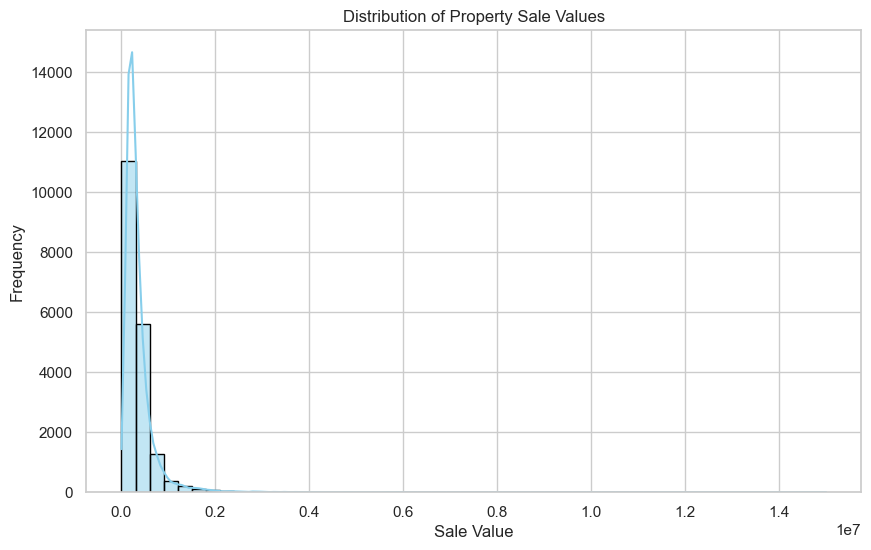

In [32]:
# Plot a histogram of the 'value' column
plt.figure(figsize=(10,6))
sns.histplot(df['value'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Property Sale Values')
plt.xlabel('Sale Value')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of property sale values is heavily right-skewed, with most of the properties having lower sale values and a few properties having very high sale values. This skewness is typical in real estate data, as there are usually a small number of very high-value properties that can drive up the average property value

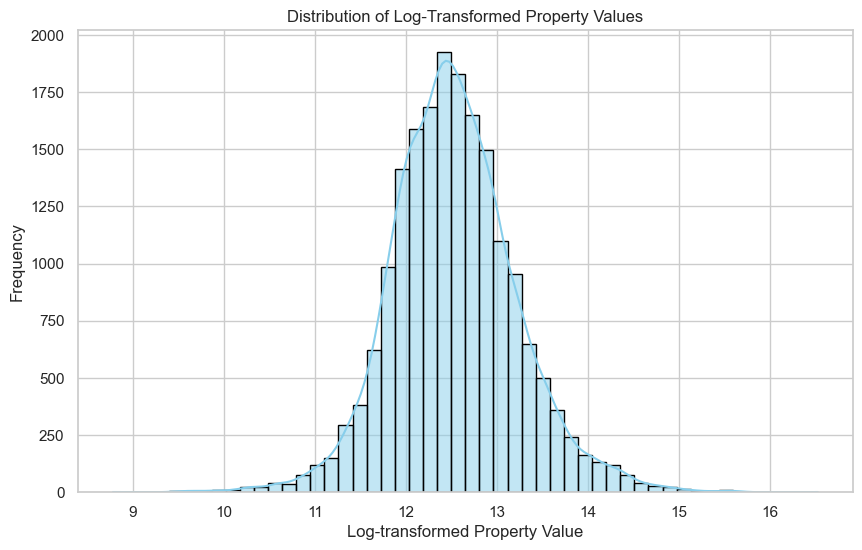

In [33]:
# Apply log transformation to 'value' values and add to the DataFrame
df['value_log'] = np.log(df['value'])

# Plot a histogram of the log-transformed 'value' values
plt.figure(figsize=(10,6))
sns.histplot(df['value_log'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Log-Transformed Property Values')
plt.xlabel('Log-transformed Property Value')
plt.ylabel('Frequency')
plt.show()

# Drop the original 'value' column
df.drop(columns='value', inplace=True)

#### taxes

In [34]:
# Check for missing or null values in the 'taxes' column
missing_taxes = df['taxes'].isnull().sum()

# Get the summary statistics for the 'taxes' column
summary_taxes = df['taxes'].describe()

display(missing_taxes, summary_taxes)

0

count     18794.000000
mean       5000.903458
std        4236.492733
min           0.000000
25%        2504.182525
50%        3963.074950
75%        6112.755025
max      133258.690000
Name: taxes, dtype: float64

Given the wide range of tax amounts, we can expect this column to be continuous and possibly skewed. As with the 'value' column, it may be beneficial to visualize the distribution of values to get a better understanding of this variable.

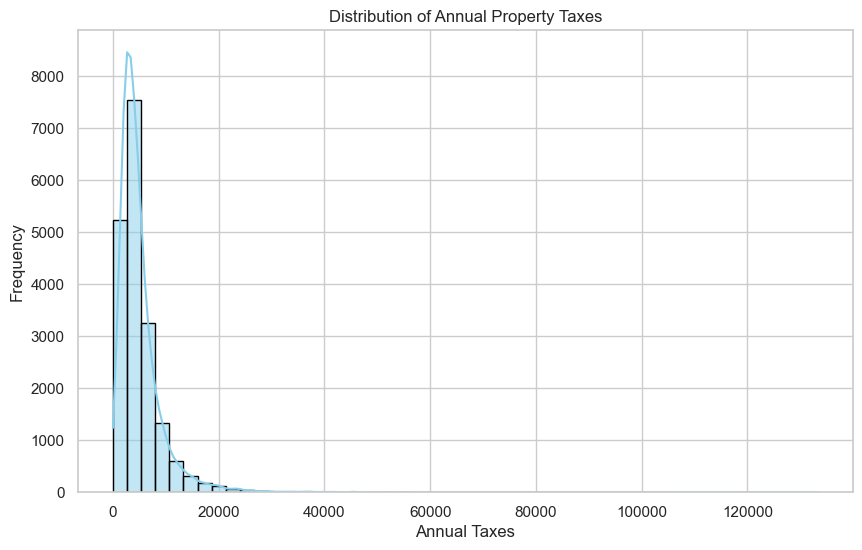

In [35]:
# Plot a histogram of the 'taxes' column
plt.figure(figsize=(10,6))
sns.histplot(df['taxes'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Annual Property Taxes')
plt.xlabel('Annual Taxes')
plt.ylabel('Frequency')
plt.show()

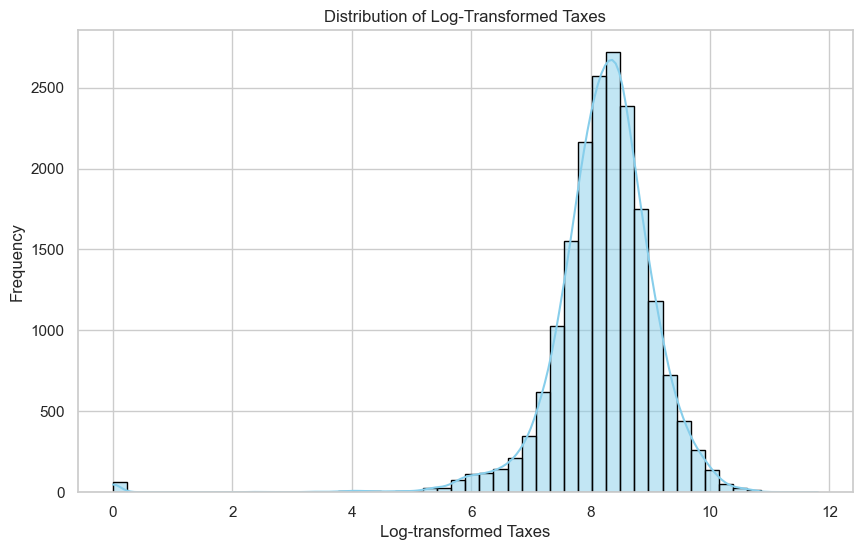

In [36]:
# Add a small constant to tax values to avoid taking the log of zero
df['taxes'] = df['taxes'] + 1

# Apply log transformation to 'taxes' values and add to the DataFrame
df['taxes_log'] = np.log(df['taxes'])

# Plot a histogram of the log-transformed 'taxes' values
plt.figure(figsize=(10,6))
sns.histplot(df['taxes_log'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Log-Transformed Taxes')
plt.xlabel('Log-transformed Taxes')
plt.ylabel('Frequency')
plt.show()

# Drop the original 'taxes' column
df.drop(columns='taxes', inplace=True)

We have now added a constant of 1 to the `tax` values, re-applied the log transformation, and plotted the distribution of the transformed values. The distribution of the log-transformed `tax` amounts still appears to be more normally distributed compared to the original values.

### homeowner

In [37]:
# Check for missing or null values in the 'homeowner' column
missing_homeowner = df['homeowner'].isnull().sum()

# Get the unique values and their counts in the 'homeowner' column
unique_homeowner = df['homeowner'].value_counts()

display(missing_homeowner, unique_homeowner)

0

0    10724
1     8070
Name: homeowner, dtype: int64

The `homeowner` column does not contain any missing values. It includes two unique values: '1' and '0', representing properties that are and are not homeowner-occupied, respectively.

### white, black, hispanic and asian

In [38]:
# Check for missing values in the 'white', 'black', 'hispanic', and 'asian' columns
missing_check_white = df['white'].isnull().sum()
missing_check_black = df['black'].isnull().sum()
missing_check_hispanic = df['hispanic'].isnull().sum()
missing_check_asian = df['asian'].isnull().sum()

# Get the unique values and their counts in the 'white', 'black', 'hispanic', and 'asian' columns
unique_values_white = df['white'].nunique()
unique_values_black = df['black'].nunique()
unique_values_hispanic = df['hispanic'].nunique()
unique_values_asian = df['asian'].nunique()

missing_check = pd.DataFrame({
    'Column': ['white', 'black', 'hispanic', 'asian'],
    'Missing Values': [missing_check_white, missing_check_black, missing_check_hispanic, missing_check_asian],
    'Unique Values': [unique_values_white, unique_values_black, unique_values_hispanic, unique_values_asian]
})

missing_check

,Column,Missing Values,Unique Values
0,white,118,1105
1,black,118,1105
2,hispanic,118,1105
3,asian,118,1104


The `white`, `black`, `hispanic`, and `asian` columns, which represent the percentage of inhabitants identified as White, Black, Hispanic, and Asian respectively in the associated property's census tract, all have 118 missing or null values.

In [39]:
# Drop rows with NaN values in 'white', 'black', 'hispanic', or 'asian' columns
df.dropna(subset=['white', 'black', 'hispanic', 'asian'], inplace=True)

# Check again for missing values in these columns
missing_check_white = df['white'].isnull().sum()
missing_check_black = df['black'].isnull().sum()
missing_check_hispanic = df['hispanic'].isnull().sum()
missing_check_asian = df['asian'].isnull().sum()

missing_check = pd.DataFrame({
    'Column': ['white', 'black', 'hispanic', 'asian'],
    'Missing Values': [missing_check_white, missing_check_black, missing_check_hispanic, missing_check_asian]
})

missing_check

,Column,Missing Values
0,white,0
1,black,0
2,hispanic,0
3,asian,0


### medhinc

In [40]:
# Check for missing or null values in the 'medhinc' column
missing_medhinc = df['medhinc'].isnull().sum()

# Get the summary statistics for the 'medhinc' column
summary_medhinc = df['medhinc'].describe()

missing_medhinc, summary_medhinc

(0,
 count     18676.000000
 mean      67199.160420
 std       26218.513672
 min        9550.000000
 25%       48099.000000
 50%       63738.000000
 75%       84223.000000
 max      192143.000000
 Name: medhinc, dtype: float64)

The summary statistics show that the mean median household income is about $67,020.15, with a standard deviation of about $26,266.30, indicating a wide spread in the median household incomes.

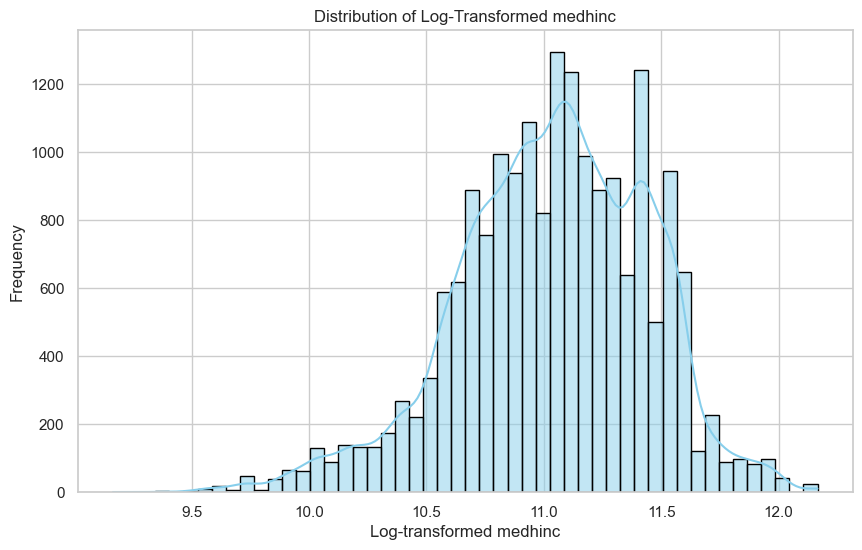

In [41]:
# Add a small constant to medhinc values to avoid taking the log of zero
df['medhinc'] = df['medhinc'] + 1

# Apply log transformation to 'medhinc' values and add to the DataFrame
df['medhinc_log'] = np.log(df['medhinc'])

# Plot a histogram of the log-transformed 'medhinc' values
plt.figure(figsize=(10,6))
sns.histplot(df['medhinc_log'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Log-Transformed medhinc')
plt.xlabel('Log-transformed medhinc')
plt.ylabel('Frequency')
plt.show()

# Drop the original 'medhinc' column
df.drop(columns='medhinc', inplace=True)

### poverty

In [42]:
# Check for missing or null values in the 'poverty' column
missing_poverty = df['poverty'].isnull().sum()

# Get the summary statistics for the 'poverty' column
summary_poverty = df['poverty'].describe().apply("{0:.2f}".format)

missing_poverty, summary_poverty

(0,
 count    18676.00
 mean         0.13
 std          0.10
 min          0.00
 25%          0.06
 50%          0.11
 75%          0.17
 max          0.78
 Name: poverty, dtype: object)

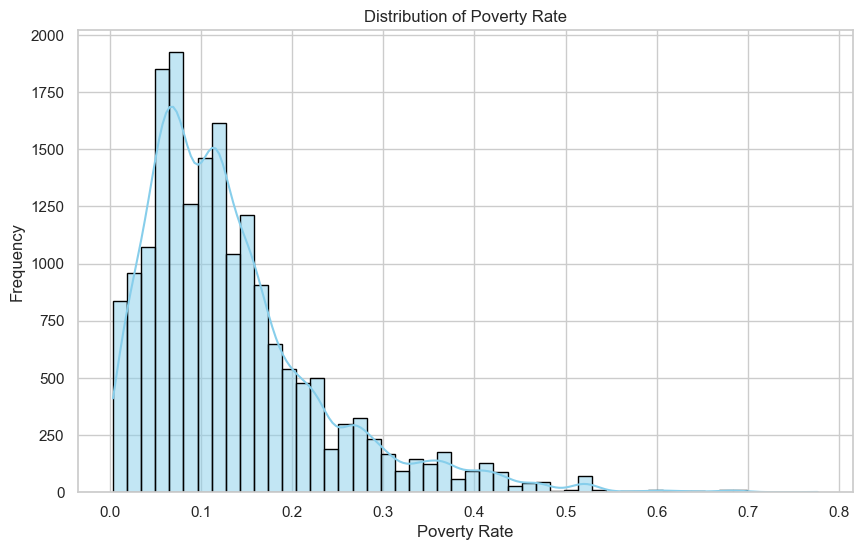

In [43]:
# Plot a histogram of the 'poverty' values
plt.figure(figsize=(10,6))
sns.histplot(df['poverty'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Poverty Rate')
plt.xlabel('Poverty Rate')
plt.ylabel('Frequency')
plt.show()

The histogram plot shows that the `poverty` column has a right-skewed distribution. The majority of the census tracts have a poverty rate less than 0.2, but there are some areas with a higher poverty rate, up to approximately 0.47.

### college

In [44]:
# Check for missing or null values in the 'college' column
missing_college = df['college'].isnull().sum()

# Get the summary statistics for the 'college' column
summary_college = df['college'].describe().apply("{0:.2f}".format)

missing_college, summary_college

(0,
 count    18676.00
 mean         0.32
 std          0.21
 min          0.00
 25%          0.14
 50%          0.27
 75%          0.51
 max          0.77
 Name: college, dtype: object)

The `college` column does not contain any missing values. It appears to be a percentage value representing the proportion of eligible adults in the property’s census tract with a 4-year college degree. The values are continuous and range from 0 to about 0.76.

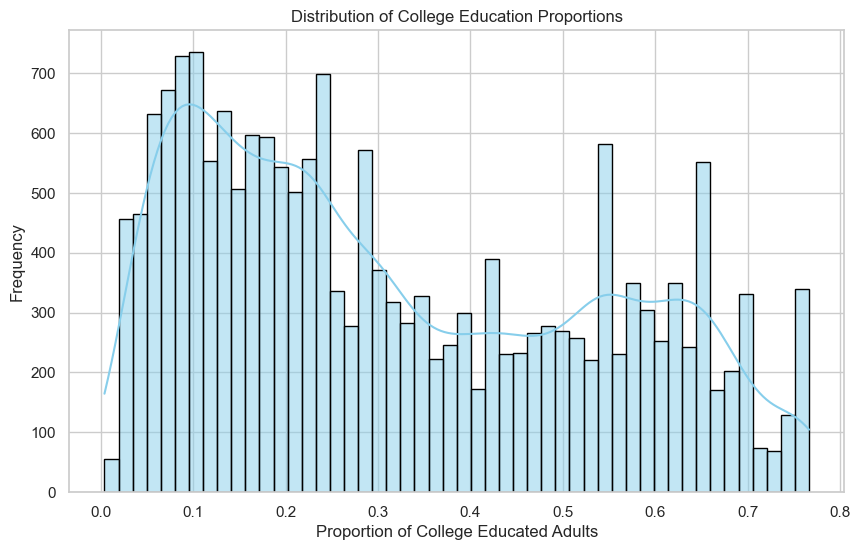

In [45]:
# Plot a histogram of the 'college' values
plt.figure(figsize=(10,6))
sns.histplot(df['college'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of College Education Proportions')
plt.xlabel('Proportion of College Educated Adults')
plt.ylabel('Frequency')
plt.show()

### squarefoot & beds

In [46]:
# Check for missing values in the 'squarefoot' and 'beds' columns
missing_squarefoot = df['squarefoot'].isnull().sum()
missing_beds = df['beds'].isnull().sum()

missing_squarefoot, missing_beds

(4966, 4966)

#### imputation

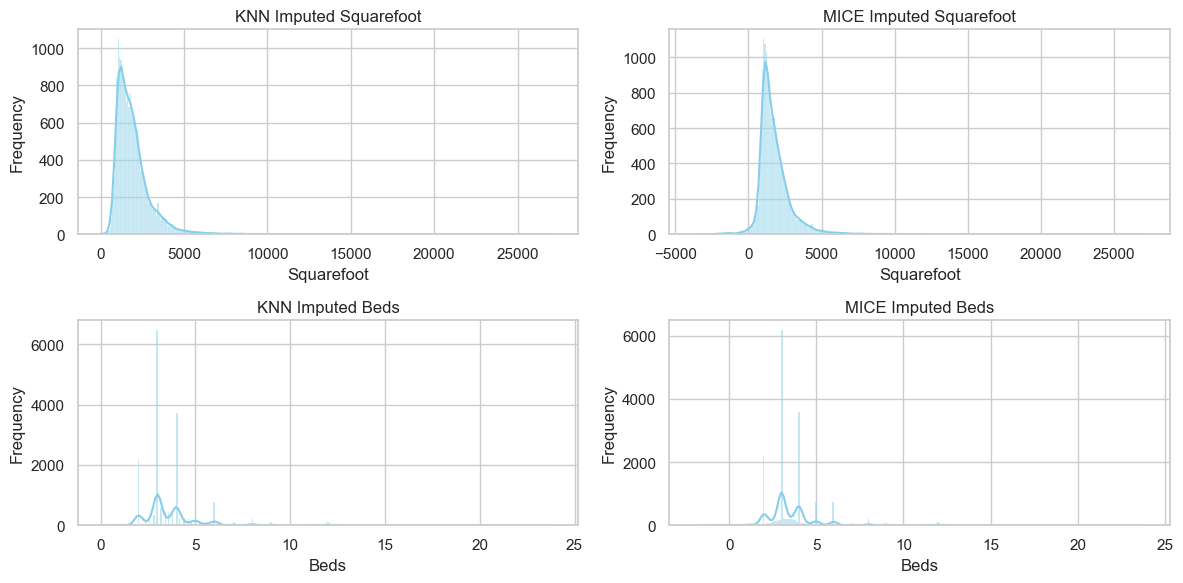

In [47]:
# Select relevant columns for imputation
impute_cols = ['squarefoot', 'beds', 'condo', 'av1_log', 'value_log', 'taxes_log', 'homeowner', 'white', 'black', 'hispanic', 'asian', 'medhinc_log', 'poverty', 'college', 'walkscore', 'elem_score', 'high_school_score', 'avg_school_score']

# Subset the DataFrame
impute_df = df[impute_cols]

# Instantiate the KNNImputer with n_neighbors=5 (you could adjust this parameter)
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
knn_imputed = knn_imputer.fit_transform(impute_df)

# Convert the result back to a DataFrame and use the column names from the original subset
knn_imputed_df = pd.DataFrame(knn_imputed, columns=impute_cols)

# Instantiate the IterativeImputer for MICE
mice_imputer = IterativeImputer(random_state=0)

# Perform MICE imputation
mice_imputed = mice_imputer.fit_transform(impute_df)

# Convert the result back to a DataFrame and use the column names from the original subset
mice_imputed_df = pd.DataFrame(mice_imputed, columns=impute_cols)

# Compare distributions of 'squarefoot' and 'beds' after KNN and MICE imputations
plt.figure(figsize=(12, 6))

# Subplots for 'squarefoot'
plt.subplot(2, 2, 1)
sns.histplot(knn_imputed_df['squarefoot'], kde=True, color='skyblue')
plt.title('KNN Imputed Squarefoot')
plt.xlabel('Squarefoot')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(mice_imputed_df['squarefoot'], kde=True, color='skyblue')
plt.title('MICE Imputed Squarefoot')
plt.xlabel('Squarefoot')
plt.ylabel('Frequency')

# Subplots for 'beds'
plt.subplot(2, 2, 3)
sns.histplot(knn_imputed_df['beds'], kde=True, color='skyblue')
plt.title('KNN Imputed Beds')
plt.xlabel('Beds')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(mice_imputed_df['beds'], kde=True, color='skyblue')
plt.title('MICE Imputed Beds')
plt.xlabel('Beds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [48]:
df_temp = df.copy()
df.reset_index(drop=True, inplace=True)
knn_imputed_df.reset_index(drop=True, inplace=True)
# Replace the original 'squarefoot' and 'beds' columns in the DataFrame with the imputed versions
df['squarefoot'] = knn_imputed_df['squarefoot']
df['beds'] = knn_imputed_df['beds']

We applied K-Nearest Neighbors (KNN) and Multiple Imputation by Chained Equations (MICE) to fill the missing values in `squarefoot` and `beds`. After comparison, we chose KNN as it resulted in a more normal-like distribution, which aligns better with our modeling assumptions for linear regression.

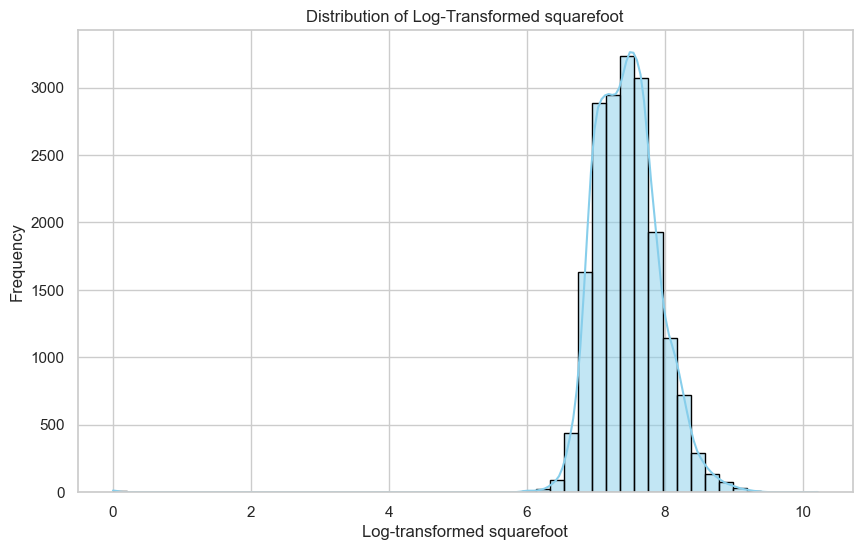

In [49]:
# Add a small constant to squarefoot values to avoid taking the log of zero
df['squarefoot'] = df['squarefoot'] + 1

# Apply log transformation to 'squarefoot' values and add to the DataFrame
df['squarefoot_log'] = np.log(df['squarefoot'])

# Drop the original 'squarefoot' column
df.drop(columns='squarefoot', inplace=True)

# Plot a histogram of the log-transformed 'squarefoot_log' values
plt.figure(figsize=(10,6))
sns.histplot(df['squarefoot_log'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Log-Transformed squarefoot')
plt.xlabel('Log-transformed squarefoot')
plt.ylabel('Frequency')
plt.show()

### walkscore & walkfac

In [50]:
# Check for missing values in the 'walkscore' column
missing_walkscore = df['walkscore'].isnull().sum()

# Get the unique values and their counts in the 'walkscore' column
unique_walkscore = df['walkscore'].value_counts()

# Check for missing values in the 'walkfac' column
missing_walkfac = df['walkfac'].isnull().sum()

# Get the unique values and their counts in the 'walkfac' column
unique_walkfac = df['walkfac'].value_counts()

missing_walkscore, unique_walkscore, missing_walkfac, unique_walkfac

(0,
 95    677
 93    559
 96    521
 94    451
 88    448
      ... 
 4      33
 2      30
 0      23
 5      22
 6      17
 Name: walkscore, Length: 101, dtype: int64,
 0,
 Very Walkable        6332
 Walker's Paradise    4384
 Somewhat Walkable    4210
 Car-Dependent        3750
 Name: walkfac, dtype: int64)

In [51]:
# Create dummy variables for 'walkfac' and drop the first one to avoid multicollinearity
walkfac_dummies = pd.get_dummies(df['walkfac'], prefix='walkfac', drop_first=True)

# Drop the original 'walkfac' column from the DataFrame
df.drop('walkfac', axis=1, inplace=True)

# Concatenate the original DataFrame with the dummy DataFrame
df = pd.concat([df, walkfac_dummies], axis=1)

df.head()

,condo,homeowner,white,black,hispanic,asian,poverty,college,beds,walkscore,...,pcity_bin,tcity_bin,av1_log,value_log,taxes_log,medhinc_log,squarefoot_log,walkfac_Somewhat Walkable,walkfac_Very Walkable,walkfac_Walker's Paradise
0,0,1,0.009383,0.967010,0.012107,0.006961,0.408146,0.149720,3.0,73,...,1,1,9.355133,11.589887,7.369096,10.311150,7.109879,0,1,0
1,0,1,0.958201,0.011670,0.064927,0.015701,0.004164,0.223537,3.0,55,...,1,1,9.870809,12.278393,8.017453,11.376751,7.186144,1,0,0
2,0,0,0.507349,0.214669,0.096806,0.244488,0.263047,0.344634,12.0,82,...,1,1,11.240972,14.126097,9.362691,10.402170,8.476580,0,1,0
3,0,0,0.884098,0.015355,0.087505,0.063736,0.011499,0.517047,4.0,76,...,1,1,11.027199,13.903063,8.076065,11.435936,7.871311,0,1,0
4,0,0,0.372888,0.502060,0.126906,0.072930,0.323849,0.182889,4.0,66,...,1,1,10.701760,12.847927,8.882028,10.343805,7.589336,1,0,0


### elem_score, high_school_score & avg_school_score

In [52]:
# Check for missing or null values in the 'elem_score', 'high_school_score', and 'avg_school_score' columns
missing_elem_score = df['elem_score'].isnull().sum()
missing_high_school_score = df['high_school_score'].isnull().sum()
missing_avg_school_score = df['avg_school_score'].isnull().sum()

# Get the summary statistics for the 'elem_score', 'high_school_score', and 'avg_school_score' columns
summary_elem_score = df['elem_score'].describe()
summary_high_school_score = df['high_school_score'].describe()
summary_avg_school_score = df['avg_school_score'].describe()

missing_values = {"elem_score": missing_elem_score, "high_school_score": missing_high_school_score, "avg_school_score": missing_avg_school_score}
summary_values = {"elem_score": summary_elem_score, "high_school_score": summary_high_school_score, "avg_school_score": summary_avg_school_score}

missing_values, summary_values

({'elem_score': 0, 'high_school_score': 0, 'avg_school_score': 0},
 {'elem_score': count    18676.000000
  mean         5.464553
  std          2.403161
  min          1.000000
  25%          4.000000
  50%          6.000000
  75%          7.000000
  max         10.000000
  Name: elem_score, dtype: float64,
  'high_school_score': count    18676.000000
  mean         5.413204
  std          2.868695
  min          1.000000
  25%          4.000000
  50%          5.000000
  75%          8.000000
  max         10.000000
  Name: high_school_score, dtype: float64,
  'avg_school_score': count    18676.000000
  mean         5.658492
  std          2.224024
  min          1.000000
  25%          4.000000
  50%          6.000000
  75%          7.000000
  max         10.000000
  Name: avg_school_score, dtype: float64})

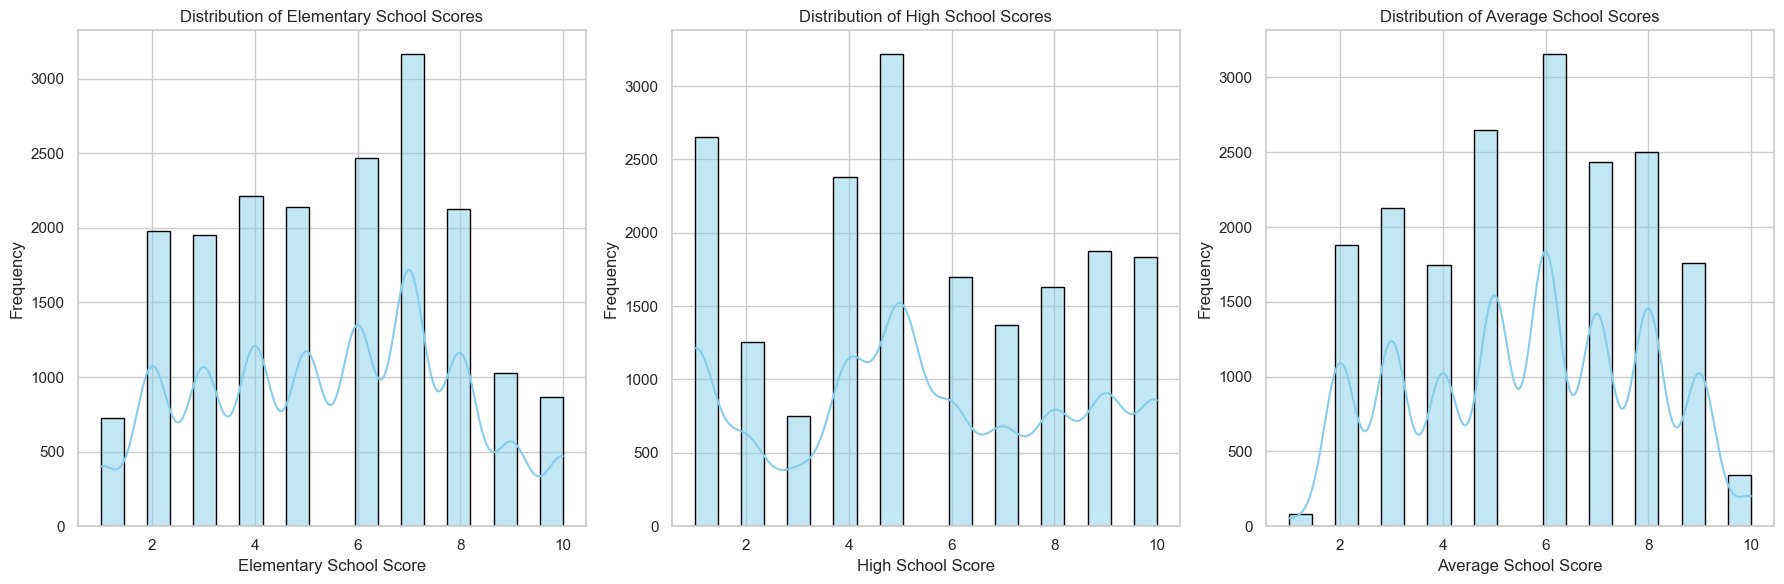

In [53]:
# Plot histogram of 'elem_score', 'high_school_score', and 'avg_school_score'
plt.figure(figsize=(18,6))

# Subplot for 'elem_score'
plt.subplot(1,3,1)
sns.histplot(df['elem_score'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Elementary School Scores')
plt.xlabel('Elementary School Score')
plt.ylabel('Frequency')

# Subplot for 'high_school_score'
plt.subplot(1,3,2)
sns.histplot(df['high_school_score'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of High School Scores')
plt.xlabel('High School Score')
plt.ylabel('Frequency')

# Subplot for 'avg_school_score'
plt.subplot(1,3,3)
sns.histplot(df['avg_school_score'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Average School Scores')
plt.xlabel('Average School Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The `elem_score`, `high_school_score`, and `avg_school_score` columns, representing the Greatschools ratings for the closest public neighborhood elementary and high schools and their average respectively, have no missing or null values.

### appeal

In [54]:
# Check for missing or null values in the 'appeal' column
missing_appeal = df['appeal'].isnull().sum()

# Get the unique values and their counts in the 'appeal' column
unique_appeal = df['appeal'].value_counts(dropna=False)

missing_appeal, unique_appeal

(9941,
 NaN        9941
 0.0        3401
 1336.0        6
 607.0         5
 780.0         5
            ... 
 525.0         1
 10882.0       1
 11492.0       1
 298.0         1
 3308.0        1
 Name: appeal, Length: 4078, dtype: int64)

In [55]:
df['appeal'].describe()

count      8735.000000
mean       4368.629307
std       11416.884349
min           0.000000
25%           0.000000
50%        1097.000000
75%        4059.000000
max      320827.000000
Name: appeal, dtype: float64

In [56]:
# Create a new column 'appeal_made' that indicates whether an appeal was made
df['appeal_made'] = df['appeal'].notnull().astype(int)

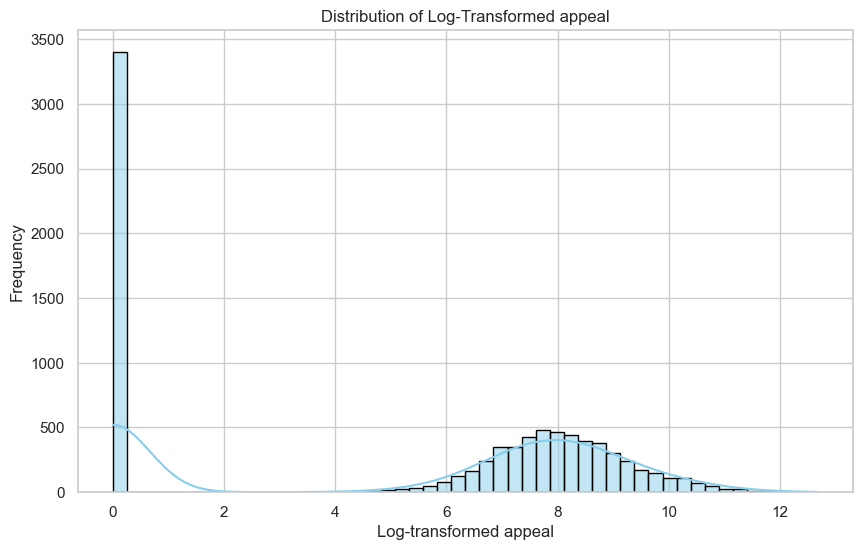

In [57]:
# Add a small constant to appeal values to avoid taking the log of zero
df['appeal'] = df['appeal'] + 1

# Apply log transformation to 'appeal' values and add to the DataFrame
df['appeal_log'] = np.log(df['appeal'])

# Plot a histogram of the log-transformed 'appeal_log' values
plt.figure(figsize=(10,6))
sns.histplot(df['appeal_log'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Log-Transformed appeal')
plt.xlabel('Log-transformed appeal')
plt.ylabel('Frequency')
plt.show()

In [58]:
df

,condo,homeowner,white,black,hispanic,asian,poverty,college,beds,walkscore,...,av1_log,value_log,taxes_log,medhinc_log,squarefoot_log,walkfac_Somewhat Walkable,walkfac_Very Walkable,walkfac_Walker's Paradise,appeal_made,appeal_log
0,0,1,0.009383,0.967010,0.012107,0.006961,0.408146,0.149720,3.0,73,...,9.355133,11.589887,7.369096,10.311150,7.109879,0,1,0,1,0.000000
1,0,1,0.958201,0.011670,0.064927,0.015701,0.004164,0.223537,3.0,55,...,9.870809,12.278393,8.017453,11.376751,7.186144,1,0,0,1,0.000000
2,0,0,0.507349,0.214669,0.096806,0.244488,0.263047,0.344634,12.0,82,...,11.240972,14.126097,9.362691,10.402170,8.476580,0,1,0,1,8.342840
3,0,0,0.884098,0.015355,0.087505,0.063736,0.011499,0.517047,4.0,76,...,11.027199,13.903063,8.076065,11.435936,7.871311,0,1,0,1,10.574133
4,0,0,0.372888,0.502060,0.126906,0.072930,0.323849,0.182889,4.0,66,...,10.701760,12.847927,8.882028,10.343805,7.589336,1,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18671,0,1,0.084563,0.822867,0.116087,0.064799,0.232177,0.081888,2.0,58,...,9.635543,11.918391,8.083085,10.636889,6.867974,1,0,0,1,0.000000
18672,0,0,0.050094,0.907076,0.030683,0.023043,0.145879,0.177907,4.0,9,...,10.287048,12.429216,8.582912,11.161750,7.813996,0,0,0,1,7.348588
18673,0,1,0.682525,0.199005,0.065609,0.078980,0.081588,0.479761,5.0,80,...,11.039444,13.487006,9.767411,11.138247,8.200837,0,1,0,1,0.000000
18674,0,0,0.766541,0.107988,0.198053,0.099358,0.096307,0.109380,2.0,32,...,9.871945,11.884489,7.841053,10.875024,6.887553,0,0,0,1,0.000000


## Exploratory Data Analysis (EDA)

### Feature Creation

Property Location: To create this feature, we'll compare the 'pcity' and 'tcity' columns. If they're the same, we'll assign a value of 1, otherwise we'll assign a value of 0.

In [59]:
df['same_city'] = (df['pcity_bin'] == df['tcity_bin']).astype(int)

Demographics: We'll create a new feature called 'predominant_race' which is the race with the highest percentage for each property.

In [60]:
df['predominant_race'] = df[['white', 'black', 'hispanic', 'asian']].idxmax(axis=1)
df = pd.get_dummies(df, columns=['predominant_race'], prefix='race', drop_first=True)

Income and Property Value: We'll compute the ratio of `medhinc_log` to `value_log` to get a sense of the affordability of properties.

In [61]:
df['income_property_value_ratio'] = df['medhinc_log'] / df['value_log']

Appeal Success: To calculate the success of the appeal, we'll take the ratio of `appeal` to `value` which gives us the percentage of the property's value that was deducted due to the appeal.

In [62]:
df['appeal_success_ratio'] = df['appeal_log'] / df['value_log']

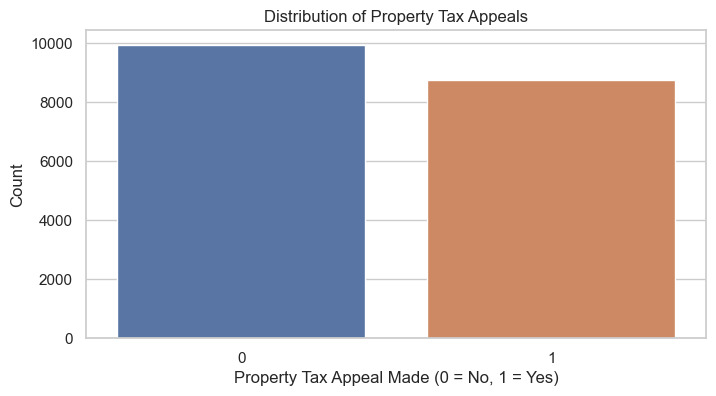

In [63]:
# Create a bar plot for the distribution of 'appeal_made'
plt.figure(figsize=(8, 4))
sns.countplot(x='appeal_made', data=df)
plt.title('Distribution of Property Tax Appeals')
plt.xlabel('Property Tax Appeal Made (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Distribution of Property Tax Appeals**: The first chart shows the distribution of property tax appeals. It appears that a significant portion of property owners have made an appeal. As this will become our dependent variable we can see that dataset is resonably balanced.

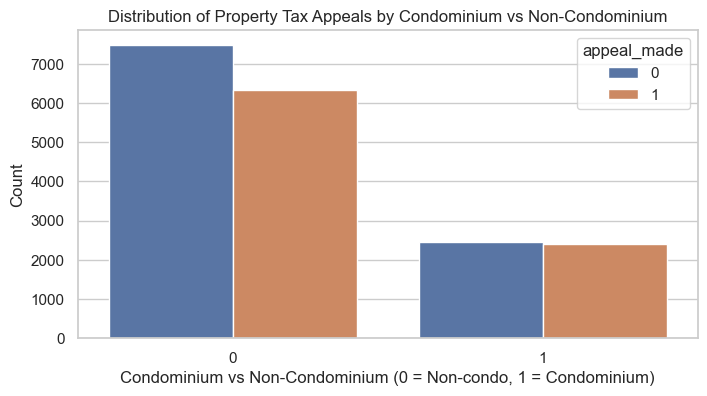

In [64]:
# Bar plot of 'appeal_made' by 'condo' (Condominium or Non-Condominium)
plt.figure(figsize=(8, 4))
sns.countplot(x='condo', hue='appeal_made', data=df)
plt.title('Distribution of Property Tax Appeals by Condominium vs Non-Condominium')
plt.xlabel('Condominium vs Non-Condominium (0 = Non-condo, 1 = Condominium)')
plt.ylabel('Count')
plt.show()

In [65]:
# Let's create a new column for the predominant race
df['predominant_race'] = df[['white', 'black', 'hispanic', 'asian']].idxmax(axis=1)

# Let's group the median household income into categories for easier visualization
df['medhinc_categories'] = pd.qcut(df['medhinc_log'], q=4, labels=["Low", "Medium-Low", "Medium-High", "High"])


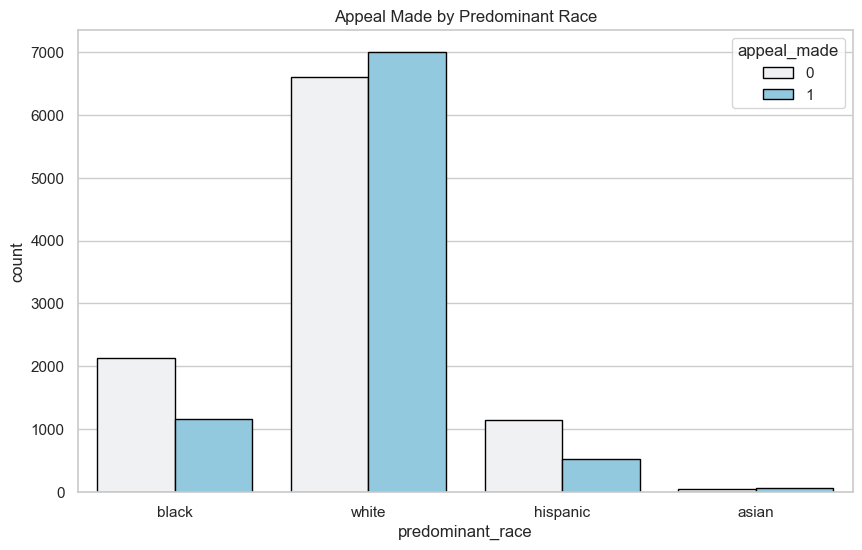

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='predominant_race', hue='appeal_made', color='skyblue', edgecolor='black')
plt.title('Appeal Made by Predominant Race')
plt.show()

The chart displays the count of appeals made, broken down by the predominant race of the census tract. Here's what we observe:

- Appeals are predominantly made in tracts where the majority race is White, followed by Black, Asian, and Hispanic.
- In all race categories, the number of tracts where an appeal was made is higher than the number where no appeal was made.

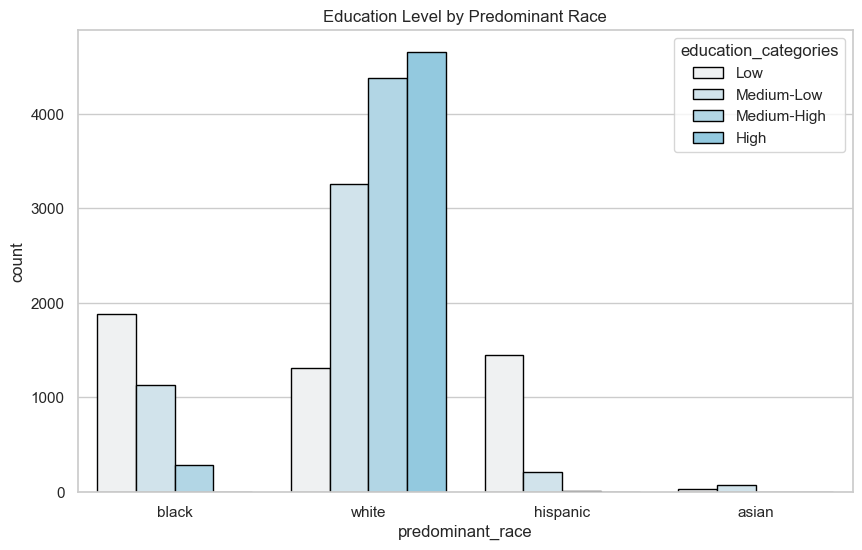

In [67]:
# Let's create a new column for education categories based on the 'college' column
df['education_categories'] = pd.qcut(df['college'], q=4, labels=["Low", "Medium-Low", "Medium-High", "High"])

# Now, let's generate a plot to visualize the relationship between race, education, and appeal/appeal_made
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='predominant_race', hue='education_categories', color='skyblue', edgecolor = 'black')
plt.title('Education Level by Predominant Race')
plt.show()

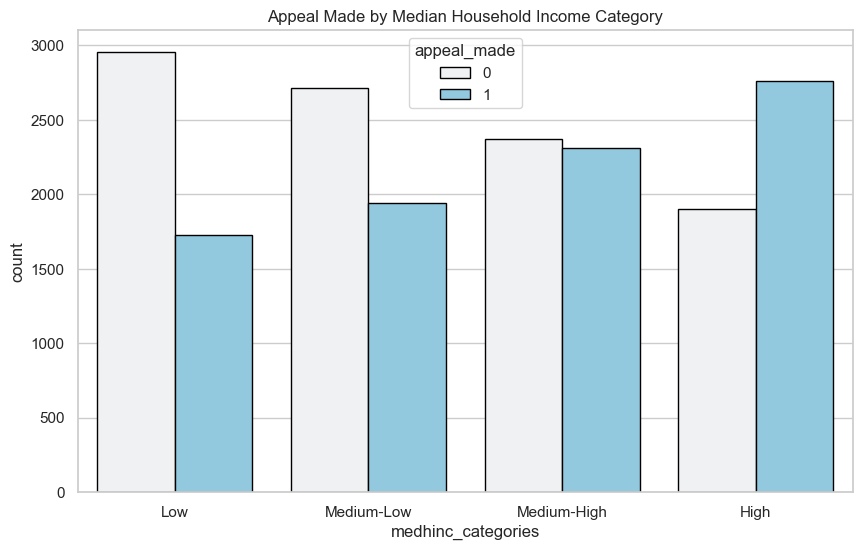

In [68]:
# Let's generate a plot to visualize the relationship between median household income (neighborhood quality) and appeal/appeal_made
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='medhinc_categories', hue='appeal_made', color='skyblue', edgecolor ='black')
plt.title('Appeal Made by Median Household Income Category')
plt.show()

This chart displays the count of appeals made, broken down by the median household income category of the census tract, which we are using as a proxy for neighborhood quality. Here's what we observe:

Appeals are predominantly made in tracts where the median household income category is "High", followed by "Medium-High", "Medium-Low", and "Low".

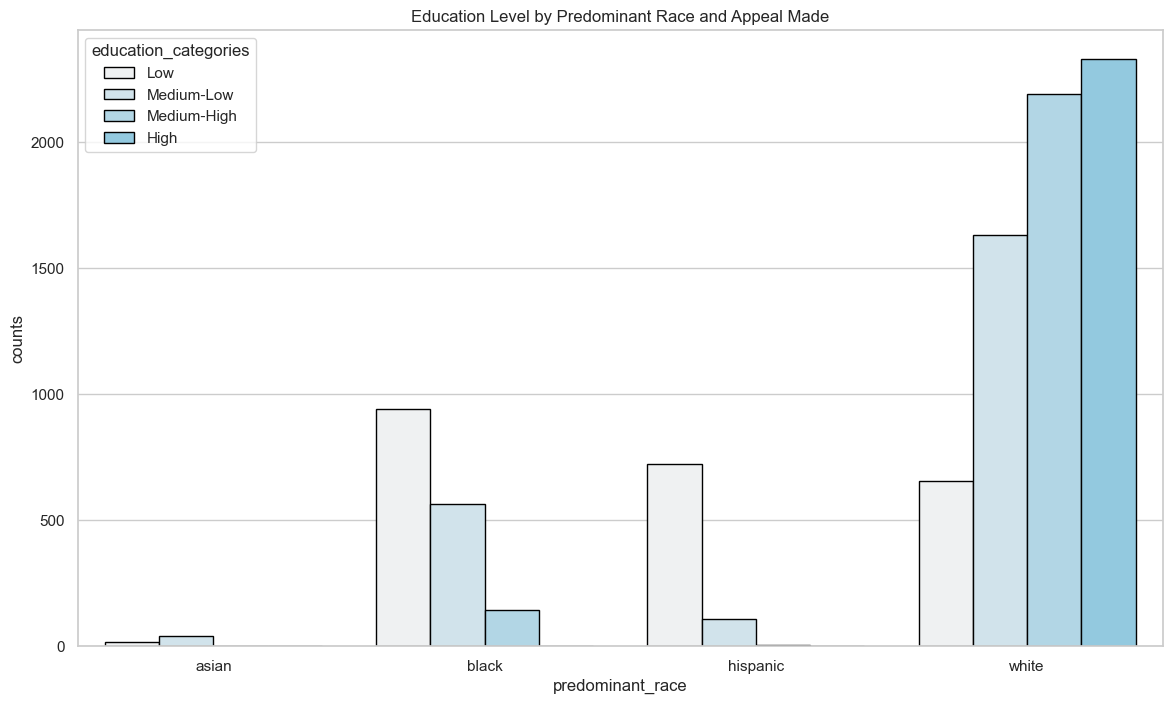

In [69]:
# We'll need to reshape the data to create a clustered bar chart with seaborn
df_clustered = df.groupby(['predominant_race', 'education_categories', 'appeal_made']).size().reset_index(name='counts')

plt.figure(figsize=(14, 8))
sns.barplot(data=df_clustered, x='predominant_race', y='counts', hue='education_categories', errorbar=None, color ='skyblue',edgecolor ='black')
plt.title('Education Level by Predominant Race and Appeal Made')
plt.show()


Among census tracts where the majority race is White, there is a clear trend that tracts with higher education levels (Medium-High and High) have more appeals.

In [70]:
# Drop the original 'walkfac' column from the DataFrame
df.drop(labels=['medhinc_categories', 'predominant_race', 'education_categories'], axis=1, inplace=True)

In [71]:
df.to_csv('ll_clean2.csv')

## Models - Linear and Logistic Regression

## Logistic Regression

What are the factors that lead a property owner to appeal? To what extent do factors like race or median income play a part?

In [72]:
dflr  = df.drop(columns=['appeal', 'appeal_log', 'appeal_success_ratio'])

In [73]:
# Define the feature matrix X and the target y
X = dflr.drop(columns=['appeal_made'])
y = dflr['appeal_made']

In [74]:
# Create interaction terms
X['beds_value_log'] = X['beds'] * X['value_log']
X['beds_squarefoot_log'] = X['beds'] * X['squarefoot_log']
X['value_log_taxes_log'] = X['value_log'] * X['taxes_log']
X['value_log_squarefoot_log'] = X['value_log'] * X['squarefoot_log']
X['taxes_log_squarefoot_log'] = X['taxes_log'] * X['squarefoot_log']

# Create polynomial features
X['beds_squared'] = X['beds'] ** 2
X['value_log_squared'] = X['value_log'] ** 2
X['taxes_log_squared'] = X['taxes_log'] ** 2
X['squarefoot_log_squared'] = X['squarefoot_log'] ** 2

# Show the first few rows of the updated DataFrame
X.head()

,condo,homeowner,white,black,hispanic,asian,poverty,college,beds,walkscore,...,income_property_value_ratio,beds_value_log,beds_squarefoot_log,value_log_taxes_log,value_log_squarefoot_log,taxes_log_squarefoot_log,beds_squared,value_log_squared,taxes_log_squared,squarefoot_log_squared
0,0,1,0.009383,0.967010,0.012107,0.006961,0.408146,0.149720,3.0,73,...,0.889668,34.769660,21.329638,85.406992,82.402696,52.393388,9.0,134.325469,54.303583,50.550386
1,0,1,0.958201,0.011670,0.064927,0.015701,0.004164,0.223537,3.0,55,...,0.926567,36.835180,21.558433,98.441436,88.234306,57.614571,9.0,150.758942,64.279545,51.640670
2,0,0,0.507349,0.214669,0.096806,0.244488,0.263047,0.344634,12.0,82,...,0.736380,169.513165,101.718954,132.258288,119.740985,79.363598,144.0,199.546618,87.659991,71.852400
3,0,0,0.884098,0.015355,0.087505,0.063736,0.011499,0.517047,4.0,76,...,0.822548,55.612254,31.485245,112.282039,109.435339,63.569218,16.0,193.295173,65.222820,61.957540
4,0,0,0.372888,0.502060,0.126906,0.072930,0.323849,0.182889,4.0,66,...,0.805095,51.391706,30.357343,114.115642,97.507229,67.408693,16.0,165.069216,78.890420,57.598018


In [75]:
# Split the updated data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
log_reg = LogisticRegression(max_iter=100000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Evaluate the model on the test data
score = log_reg.score(X_test, y_test)
score

0.6351713062098501

In [76]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a new instance of LogisticRegression
log_reg_scaled = LogisticRegression(max_iter=100000)

# Fit the model on the scaled training data
log_reg_scaled.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled test data
score_scaled = log_reg_scaled.score(X_test_scaled, y_test)
score_scaled

0.6402569593147751

In [77]:
# Defining the parameter grid for the logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


c:\Users\alen.pavlovic\.conda\envs\env\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [78]:
# Use the best estimator from GridSearchCV to make predictions on the validation set
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [79]:
# Best Parameters
print("Best Parameters: ", grid_search.best_params_)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Best Parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix:
 [[1401  623]
 [ 720  992]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68      2024
           1       0.61      0.58      0.60      1712

    accuracy                           0.64      3736
   macro avg       0.64      0.64      0.64      3736
weighted avg       0.64      0.64      0.64      3736



The **Confusion Matrix**  tells us that the model correctly predicted 1400 instances where the house owner did not appeal (True Negatives) and 994 instances where the house owner did appeal (True Positives). On the other hand, the model incorrectly predicted 624 instances where the house owner did not appeal (False Positives) and 718 instances where the house owner did appeal (False Negatives).

**Classification Report**:

The classification report shows the precision, recall, f1-score and support for the classes.

For class 0 (house owner did not appeal):

- Precision: 0.66
- Recall: 0.69
- F1-score: 0.68

For class 1 (house owner did appeal):

- Precision: 0.61
- Recall: 0.58
- F1-score: 0.60

The overall accuracy of the model is 0.64.

In [80]:
# Get the best model
best_model = grid_search.best_estimator_

# Get the coefficients of the best model
coefficients = best_model.coef_

# Get the absolute values of the coefficients and create a new DataFrame
feature_importances = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': abs(best_model.coef_[0])
})

# Sort the DataFrame by the importance of the features in descending order
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(feature_importances_sorted.head(10))


                        Feature  Importance
40            value_log_squared    4.357400
36          value_log_taxes_log    2.916455
37     value_log_squarefoot_log    2.784122
3                         black    1.441537
38     taxes_log_squarefoot_log    1.339426
2                         white    1.272341
33  income_property_value_ratio    1.184095
23                    taxes_log    1.057163
24                  medhinc_log    0.946730
22                    value_log    0.902867


Most Important Features:

The top 3 most important features for the model are:

- value_log_squared
- value_log_taxes_log
- value_log_squarefoot_log

## Linear Regression

The monetary reduction on taxes if they win an appeal

In [81]:
df_lingreg  = df[df['appeal_made']== True].drop(columns=['appeal', 'appeal_made', 'appeal_success_ratio'])

In [82]:
df_lingreg

,condo,homeowner,white,black,hispanic,asian,poverty,college,beds,walkscore,...,squarefoot_log,walkfac_Somewhat Walkable,walkfac_Very Walkable,walkfac_Walker's Paradise,appeal_log,same_city,race_black,race_hispanic,race_white,income_property_value_ratio
0,0,1,0.009383,0.967010,0.012107,0.006961,0.408146,0.149720,3.0,73,...,7.109879,0,1,0,0.000000,1,1,0,0,0.889668
1,0,1,0.958201,0.011670,0.064927,0.015701,0.004164,0.223537,3.0,55,...,7.186144,1,0,0,0.000000,1,0,0,1,0.926567
2,0,0,0.507349,0.214669,0.096806,0.244488,0.263047,0.344634,12.0,82,...,8.476580,0,1,0,8.342840,1,0,0,1,0.736380
3,0,0,0.884098,0.015355,0.087505,0.063736,0.011499,0.517047,4.0,76,...,7.871311,0,1,0,10.574133,1,0,0,1,0.822548
4,0,0,0.372888,0.502060,0.126906,0.072930,0.323849,0.182889,4.0,66,...,7.589336,1,0,0,0.000000,1,1,0,0,0.805095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18671,0,1,0.084563,0.822867,0.116087,0.064799,0.232177,0.081888,2.0,58,...,6.867974,1,0,0,0.000000,1,1,0,0,0.892477
18672,0,0,0.050094,0.907076,0.030683,0.023043,0.145879,0.177907,4.0,9,...,7.813996,0,0,0,7.348588,1,1,0,0,0.898025
18673,0,1,0.682525,0.199005,0.065609,0.078980,0.081588,0.479761,5.0,80,...,8.200837,0,1,0,0.000000,1,0,0,1,0.825850
18674,0,0,0.766541,0.107988,0.198053,0.099358,0.096307,0.109380,2.0,32,...,6.887553,0,0,0,0.000000,1,0,0,1,0.915060


In [83]:
# Split the data into features (X) and target (y)
X = df_lingreg.drop(columns=['appeal_log'])
y = df_lingreg['appeal_log']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test_scaled)

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(3.597721461659244, 14.930164016931014, 3.86395704128954, 0.08593490496073697)

The linear regression model has the following performance metrics:

- Mean Absolute Error (MAE): 3.29
- Mean Squared Error (MSE): 12.56
- Root Mean Squared Error (RMSE): 3.54
- R^2 Score: 0.09

The R^2 score is quite low, which indicates that the model doesn't explain much of the variance in the data. The errors (MAE, MSE, RMSE) are also relatively high. We should consider improving the model by tuning hyperparameters.

In [84]:
df_lingreg_appeal_success = df_lingreg[df_lingreg['appeal_log']> 0]

# Split the data into features (X) and target (y)
X = df_lingreg_appeal_success.drop(columns=['appeal_log'])
y = df_lingreg_appeal_success['appeal_log']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test_scaled)

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(0.7399288033041872,
 0.9015373334131022,
 0.9494931981921209,
 0.38607035511407894)

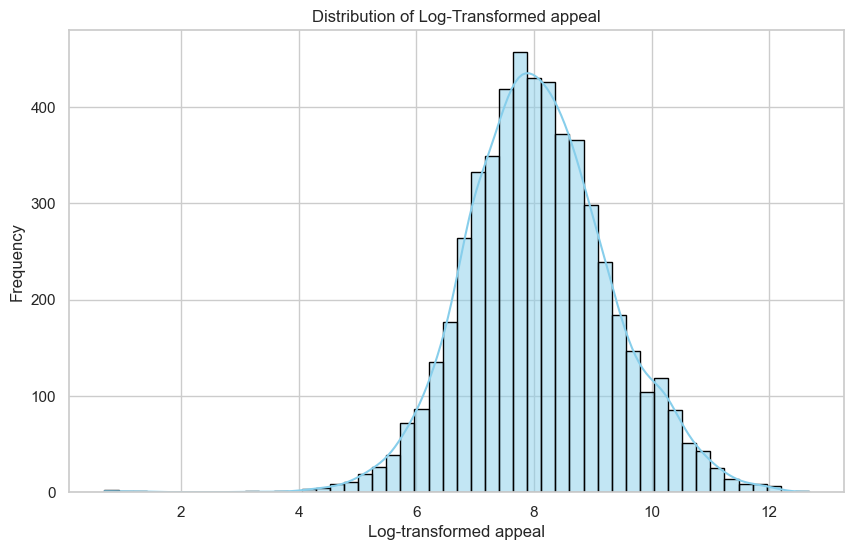

In [85]:
# Plot a histogram of the log-transformed 'appeal_log' values
plt.figure(figsize=(10,6))
sns.histplot(df_lingreg_appeal_success['appeal_log'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Log-Transformed appeal')
plt.xlabel('Log-transformed appeal')
plt.ylabel('Frequency')
plt.show()

The performance of the model on the test set from the new data is as follows:

- Mean Absolute Error (MAE): 0.7399
- Mean Squared Error (MSE): 0.9015
- Root Mean Squared Error (RMSE): 0.9495
- R-squared (R²) score: 0.3861

These metrics indicate that the model, on average, makes an error of 0.7399 on the logarithmic scale of 'appeal_log' when predicting on unseen data. The R² score is relatively higher than before, suggesting that the model explains a reasonable proportion of the variance in the response data around its mean.

The enhanced performance of this model can be attributed to the high volume of appeals that unfortunately did not result in tax benefits for the property owners. Consequently, the data distribution deviates from normality and is heavily skewed towards zero, creating a significant peak. This characteristic adversely impacts the efficacy of linear regression models, which inherently assume a certain level of linearity in the data. In such scenarios where the data exhibits non-linear patterns, alternative modeling approaches such as non-linear regression models tend to provide superior results.

## Conclusion

We used linear and logistic regression models on property tax appeal data. The linear model, aimed at predicting the logarithmic scale of appeal values, had limitations due to skewness towards zero. The logistic model, predicting whether an appeal was made, achieved an accuracy of 0.64, driven by log house value, taxes, square footage, and race.

Additional variables like location, house age, and historical tax data could improve model performance. Non-linear models might be beneficial given the non-linear patterns in the data.

In conclusion, the models offer initial insights into property tax appeals, with substantial opportunities for refinement and enhanced predictive power, particularly by incorporating more data and exploring non-linear models.